In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os



In [2]:
path = "data/clear_data_河南村镇银行多位储户又被赋红码.xlsx"
data = pd.read_excel(path)
data.head()


,parent_comment_id,comment_id,comment_time,comment_user_name,comment_user_link,comment_like_num,child_comment_num,comment_content,sentiment_score,sentiment
0,NaN,4788889803817812,2022-7-08 09,撒哈拉齐齐呢,https://weibo.com//u/1825177077,0,0,真的丢人,0.272671,negative
1,NaN,4788878025952653,2022-7-08 08,红旗漫卷西风202104,https://weibo.com//u/7699349063,0,0,真的丢人,0.272671,negative
2,NaN,4788853523087624,2022-7-08 07,伍豪的利剑,https://weibo.com//u/6348572065,0,0,这是p的吧，我们河北的是长城,0.520500,positive
3,NaN,4788819708608647,2022-7-08 04,KoBad2018,https://weibo.com//u/3006358435,0,0,这是啥操作？生怕关注度降低？,0.467265,negative
4,NaN,4788800335643357,2022-7-08 03,jokerandjokes699,https://weibo.com//u/7742568191,0,0,今天天天喊7-24防疫的，明年没有医保报销时，核酸商给你报？还是指望哪个领导管你医保？,0.347296,negative


In [5]:
import numpy as np

# days = data["comment_time"]
# days.dropna(inplace=True)
# days = days.unique()
# days.sort()
# days = days[np.where(days < '2022-3-18')]
# print(days)
# print(len(days))
# data.dropna(subset=["comment_time"], inplace=True)
times = data["comment_time"]
new_times = []
for time in times:
    new_times.append(time[:9])
data["comment_time"] = new_times
days = data["comment_time"].unique()[:5]
days.sort()


In [8]:
for day in days:
    print(day,"评论数",data[data['comment_time'] == day].shape[0])

2022-7-07 评论数 46
2022-7-08 评论数 4623
2022-7-09 评论数 388
2022-7-10 评论数 1101
2022-7-11 评论数 174


0 - (46, 10)


NameError: name 'x' is not defined

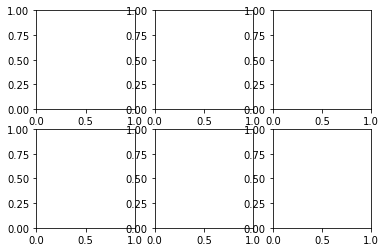

In [4]:
# x, y = 0, 0

# import math
# def painting(n):

#     y = 3
#     x = None
#     N = math.ceil(len(days)/n)
#     for i in range(1, N):
#         if i*y >= N:
#             x = i
#             break
#     def getPos():
#         global x, y
#         a, b = x, y
#         y += 1
#         if y == 3:
#             y = 0
#             x += 1
#         return a, b
#     fig,subs=plt.subplots(x,y)
#     i = 0
#     result = None
#     for day in days:
#         t = data[data["comment_time"] == day]
#         if result is None:
#             result = t.copy()
#         else:
#             result = pd.concat([t, result])
#         if (i % n == 0 and i != 0) or n == 1:
#             print(i, "-", result.shape)
#             a, b = getPos()
#             subs[a][b].hist(result["sentiment_score"], bins=40)
#             subs[a][b].set_title(day)
#             result = None
#         elif (i == len(days) - 1) or n == 1:
#             print(i, "-", result.shape)
#             a, b = getPos()
#             subs[a][b].hist(result["sentiment_score"], bins=40)
#             subs[a][b].set_title(day)
#             result = None
#         i += 1

#     plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.9)

#     plt.show()
# painting(1)
# subs[0][0].hist()

# plt.show()



In [64]:
cur = data[data['comment_time'] == '2022-7-08']['sentiment_score']

In [6]:
from pyecharts.charts import Bar, Grid
from pyecharts.faker import Faker
from pyecharts.globals import ThemeType
from pyecharts import options as opts
from pyecharts.faker import Faker
from collections import Counter
import math

def bar(cur, title):
    x = {}
    for i in cur:
        i = round(i, 2)
        x[i] = x.get(i, 0) + 1
    items = sorted(x)
    y = []
    for item in items:
        value = x[item]
        if item < 0.5:
            y.append(
                opts.BarItem(
                    name=item,
                    value=value,
                    itemstyle_opts=opts.ItemStyleOpts(color="#ff8b8b"),
                )
            )
        elif item == 0.5:
            y.append(
                opts.BarItem(
                    name=item,
                    value=value,
                    itemstyle_opts=opts.ItemStyleOpts(color="pink"),
                )
            )
        else:
            y.append(
                opts.BarItem(
                    name=item,
                    value=value,
                    itemstyle_opts=opts.ItemStyleOpts(color="#0BBCD6"),
                )
            )

    c = (
        Bar({"theme": ThemeType.MACARONS})
        .add_xaxis(items)
        .add_yaxis("Frequency", y, category_gap=2, color=Faker.rand_color(), label_opts = opts.LabelOpts(is_show=False))
        .set_global_opts(
            title_opts=opts.TitleOpts(title=title, pos_left='center'),
            legend_opts = opts.LegendOpts(is_show = False),
            yaxis_opts=opts.AxisOpts(name = 'Frequency', name_location='center', name_gap=50, split_number=5, name_textstyle_opts=opts.TextStyleOpts(font_size=16)),
            xaxis_opts=opts.AxisOpts(name = 'sentiment_score', name_location='center', name_gap=30,
            name_textstyle_opts=opts.TextStyleOpts(font_size=16))
        )
    )
    return c


In [7]:
x, y = 0, 0
from pyecharts.charts import Bar, Grid, Page
import math
def painting(n):

    # grid = Grid(init_opts=opts.InitOpts(theme=ThemeType.ROMA, width='1600px'))
    page = Page(layout=Page.SimplePageLayout)
    result = None
    i = 1
    for day in days:
        t = data[data["comment_time"] == day]
        if result is None:
            result = t.copy()
        else:
            result = pd.concat([t, result])

        if i % n == 0 or n == 1:
            page.add(bar(result["sentiment_score"], day))
            result = None
        i+=1
    page.render()
    return page
# painting(1)

In [1]:
import numpy as np
import pandas as pd

path = 'clear_data_东航失事.xlsx'
data = pd.read_excel('data/' + path)
data.head()

,parent_comment_id,comment_id,comment_time,comment_user_name,comment_user_link,comment_like_num,child_comment_num,comment_content,sentiment_score,sentiment
0,NaN,4749501409007360,2022-3-21 16,Margaret_Vogue,https://weibo.com//u/7498302611,1,0,愿平安,0.728775,positive
1,NaN,4749668644552849,2022-3-22 03,王有元YuRvn,https://weibo.com//u/1045056693,2,2,愿平安,0.728775,positive
2,4.749669e+15,4752029782380330,2022-3-28 16,By地震了,https://weibo.com//u/5474299869,0,0,你火了,0.496154,negative
3,4.749669e+15,4749690678018412,2022-3-22 05,蒋至,https://weibo.com//u/1993857121,0,0,杀币玩意，福建人说白话?！,0.526548,positive
4,NaN,4749513178480696,2022-3-21 17,高个子妈妈,https://weibo.com//u/5850774022,1,0,看着好揪心呀,0.275569,negative


In [24]:
times = data["comment_time"]
new_times = []
for time in times:
    new_times.append(time[:9])
data["comment_time"] = new_times
days = data["comment_time"].unique()
days.sort()
# for day in days:
#     print(data[data['comment_time'] == day].shape)

page = Page(layout=Page.SimplePageLayout)
result = None
i = 1
t = data[data["comment_time"] == days[0]]
page.add(bar(t["sentiment_score"], days[0]))
t = data[data["comment_time"] == days[1]]
page.add(bar(t["sentiment_score"], days[1]))
t = data[data["comment_time"] == days[2]]
t = pd.concat([t.copy(), data[data["comment_time"] == days[3]]])
page.add(bar(t["sentiment_score"], days[3]))


for day in days[4:]:
    t = data[data["comment_time"] == day]
    if result is None:
        result = t.copy()
    else:
        result = pd.concat([t, result])

    if day == days[-1]:
        page.add(bar(result["sentiment_score"], day))
        result = None
page.render()

(50, 10)
(37, 10)
(130, 10)
(51, 10)
(17, 10)
(10, 10)
(4, 10)
(3, 10)
(6, 10)
(7, 10)
(2, 10)
(3, 10)
(3, 10)
(1, 10)
(1, 10)
(2, 10)
(5, 10)
(6, 10)
(1, 10)
(1, 10)
(3, 10)
(1, 10)
(4, 10)
(1, 10)
(2, 10)
(5, 10)
(2, 10)
(1, 10)
(1, 10)
(5, 10)
(1, 10)
(1, 10)
(2, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(2, 10)
(12, 10)
(3, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(2, 10)
(1, 10)
(6, 10)
(2, 10)
(2, 10)
(3, 10)
(3, 10)
(2, 10)
(1, 10)
(5, 10)


'c:\\Users\\zhuima\\Desktop\\深圳杯\\render.html'

In [13]:
painting(2)

(566, 10)
(503, 10)
(209, 10)
(93, 10)
(50, 10)
(37, 10)
(130, 10)
(51, 10)
(17, 10)
(10, 10)
(4, 10)
(3, 10)
(6, 10)
(7, 10)
(2, 10)
(3, 10)
(3, 10)
(1, 10)
(1, 10)
(2, 10)
(5, 10)
(6, 10)
(1, 10)
(1, 10)
(3, 10)
(1, 10)
(4, 10)
(1, 10)
(2, 10)
(5, 10)
(2, 10)
(1, 10)
(1, 10)
(5, 10)
(1, 10)
(1, 10)
(2, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(2, 10)
(12, 10)
(3, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(2, 10)
(1, 10)
(6, 10)
(2, 10)
(2, 10)
(3, 10)
(3, 10)
(2, 10)
(1, 10)
(5, 10)


In [2]:
import numpy as np
import pandas as pd

path = 'clear_data_警方认定网红用濒危大白鲨做美食.xlsx'
data = pd.read_excel('data/' + path)
data.head()

,parent_comment_id,comment_id,comment_time,comment_user_name,comment_user_link,comment_like_num,child_comment_num,comment_content,sentiment_score,sentiment
0,NaN,4797664136271027,2022-8-01-14,张宏遒,https://weibo.com//u/3735753205,3,1,冷知识，中华人民共和国残疾人证是95年才第一次发布,0.348059,negative
1,4.797664e+15,4797664988235891,2022-8-01-14,无侠社,https://weibo.com//u/2300151724,0,0,牛逼克拉斯,0.503957,positive
2,NaN,4797199759705354,2022-7-31-07,真龙天子12000,https://weibo.com//u/1723587135,2,18,残疾是真的，赡养老人也是真的。 其他部分算是外甥的创作。。。 如果把这视频文案做为作品， 而...,0.514818,positive
3,4.797200e+15,4797211843496935,2022-7-31-08,无侠社,https://weibo.com//u/2300151724,0,0,不行，现实想象不能凭空捏造，否则个个造谣污蔑人身攻击！,0.271400,negative
4,4.797200e+15,4797211764591701,2022-7-31-08,景天在云上,https://weibo.com//u/1957032363,0,0,那不更是楚门世界,0.504128,positive


In [12]:
times = data["comment_time"]
new_times = []
# for time in times:
#     new_times.append(time[:9])
# data["comment_time"] = new_times
days = data["comment_time"].unique()
days.sort()
days = days[7:]
# print(days)
total = 0
for day in days:
    # print(data[data['comment_time'] == day].shape)
    total += data[data['comment_time'] == day].shape[0]
print(total)
painting(6)

8619


In [4]:

data = pd.read_excel("data/clear_data_二舅治好了我的精神内耗.xlsx")
data.head()

,parent_comment_id,comment_id,comment_time,comment_user_name,comment_user_link,comment_like_num,child_comment_num,parent_name,comment_content,uid,sentiment_score,sentiment
0,4795613000237360,4795615803083133,2022-7-26 22,木芙蓉花膏,https://weibo.com//u/3286345757,0,0,木芙蓉花膏,还有一种乐观精神,3286345757,0.707054,positive
1,4795613092782599,4795613801352132,2022-7-26 22,MoonquakeRemix,https://weibo.com//u/5973273563,0,1,yyyybbbbbbbbbb,你担忧什么,5973273563,0.269121,negative
2,4795613801352130,4795614250140427,2022-7-26 22,yyyybbbbbbbbbb,https://weibo.com//u/6554818771,0,0,NaN,…是哦…或许是…找…找工作…？这段时间活得我都脱离人世间了,6554818771,0.452562,negative
3,4795613130790417,4795617420773299,2022-7-26 23,Paradise-Earth,https://weibo.com//u/7560341323,0,0,进步青年ERIC,地球爆炸吧,7560341323,0.430008,negative
4,4795613152283320,4795667345572058,2022-7-27 02,刘小涵_lewis,https://weibo.com//u/5026075485,0,1,Lucas啦啦啦啦啦,这个视频做的真好,5026075485,0.727854,positive


In [5]:
times = data["comment_time"]
new_times = []
for time in times:
    new_times.append(time[:9])
data["comment_time"] = new_times
days = data["comment_time"].unique()
days.sort()
for day in days:
    print(data[data['comment_time'] == day].shape[0], day)

63 2022-7-26
3621 2022-7-27
1577 2022-7-28
916 2022-7-29
372 2022-7-30
219 2022-7-31
740 2022-8-01
277 2022-8-02
52 2022-8-03
25 2022-8-04
29 2022-8-05
105 2022-8-06
131 2022-8-07


In [9]:
painting(2)